# 1 Neural Networks

This solution differs from what was asked for in the exercise in three ways:
1. The model has a hidden layer of dim=10 instead of 25 (can be easily changed)
2. The minimizetion algorithem I've been asked to use don't work (either by computation error or don't converge), so a simpel GD algorithem was implemented instead.
3. The code is vectorize

<b> all those changes are the result of my computer's fans screaming, as if they were been brutally stub to death, and it had a good enough result<b/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib.pyplot as plt
from utils import *

In [2]:
data = loadmat('../data/ex4data1.mat')
y = data['y']
y %= 10 # fixes “0” digit is labeled as “10”
y = np.squeeze(y) # shape [N,1] -> [N,]
X = data['X'] 
X = np.append(np.ones([X.shape[0],1]),X, axis=1) # add bais

In [3]:
m = X.shape[0]
inputDim = X.shape[1]
hiddenDim = 10
outputDim = 10

## 1.1 Visualizing the data

2


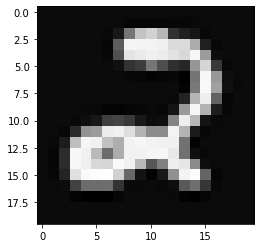

In [4]:
img_num = np.random.randint(len(y))
img = np.reshape(X[img_num, 1:], [20,20]).T
print(y[img_num])
plt.imshow(img, cmap='gray')
plt.show()

## 1.2 Model representation

In [5]:
weights = loadmat('../data/ex4weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


## 1.3 Feedforward and cost function
code is in utils.py

# 2 Backpropagation
code is in utils.py

## 2.4 Gradient checking

In [14]:
test_Theta1 = rand_initialize_weights(inputDim, hiddenDim) # (hiddenDim, inputDim)
test_Theta2 = rand_initialize_weights(hiddenDim+1, outputDim) # (outputDim, hiddenDim+1)

shape1 = test_Theta1.shape
shape2 = test_Theta2.shape
test_ThetaV = roll(test_Theta1, test_Theta2)

cum_err = 0.0

eps = 1e-4
l=1.0

grad, loss = compute_grad(test_ThetaV, X,y, shape1, shape2, l)
loc_vec = np.random.randint(0, len(test_ThetaV), 25)

for loc in loc_vec:
    T_plus = test_ThetaV.copy()
    T_minus = test_ThetaV.copy()
    T_plus[loc] += eps 
    T_minus[loc] -= eps

    numeric_grad = (nn_cost_function(T_plus,X,y,shape1,shape2,l) - nn_cost_function(T_minus,X,y,shape1,shape2,l))/(2*eps)
    
    cum_err += np.abs((numeric_grad-grad[loc]))
    
print(cum_err)

1.5730653322920123e-10


## 2.6 Learning parameters using fmincg

In [15]:
##### NOTE: this is what the exercise asks for, but it doesn't work. see gd in utils.py.

# init_Theta1 = randInitializeWeights(inputDim, hiddenDim) # (hiddenDim, inputDim)
# init_Theta2 = randInitializeWeights(hiddenDim+1, outputDim) # (outputDim, hiddenDim+1)

# shape1 = init_Theta1.shape
# shape2 = init_Theta2.shape
# init_ThetaV = roll(init_Theta1, init_Theta2)

# op_result = minimize(nnCostFunction, init_ThetaV, args=(X,y,shape1,shape2), method='TNC', jac=computeGrad)

##### NOTE: this is what the exercise asks for, but it doesn't work. see gd in utils.py.

In [ ]:
iterations = 4000 # must be int
alpha = 1
print_loss_every = 100

init_Theta1 = rand_initialize_weights(inputDim, hiddenDim) # (hiddenDim, inputDim)
init_Theta2 = rand_initialize_weights(hiddenDim+1, outputDim) # (outputDim, hiddenDim+1)

shape1 = init_Theta1.shape
shape2 = init_Theta2.shape

init_ThetaV = roll(init_Theta1, init_Theta2)


ThetaV ,loss = gd(init_ThetaV, X,y, shape1, shape2, iterations=iterations, alpha = alpha, print_loss_every=print_loss_every)

The accuracy is: 0.9704


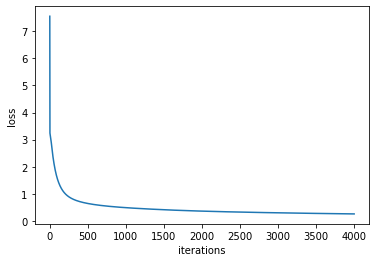

In [19]:
plt.plot(range(iterations), loss)

final_Theta1, final_Theta2 = unroll(ThetaV, shape1, shape2)
tup = ff(final_Theta1, final_Theta2, X)
prob = tup[-1]
pred = prob.argmax(axis=1)
acc = ((pred-y)==0).sum()/len(y)
print('The accuracy is: ' + str(acc))
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()